<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 13 - Midterm Coding Exam

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# NOTE

Midterm Assignment này bao gồm 3 phần

1.   Thực hành sklearn cho bài toán Binary Classification (3đ)
2.   Thực hành Tensorflow 2 cho bài toán Multi-Class Classification (4đ)
3.   Thực hành EDA (3đ)

Sửa tên file thành **S13_MIDTERM_FULLNAME** (ví dụ: S13_MIDTERM_LeNguyenThanhHuy).

Sau khi hoàn thành bài thi, download file .ipynb về và nộp bài ở Elearning



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 13.1 [3 Points] Binary Classification

## 13.1.1 [1 Point] Prepare and Visualize Dataset

**Chạy cell bên dưới để khởi tạo Dataset**

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=.05,random_state=42)
print('Shape of dataset:', (X.shape, y.shape))

Shape of dataset: ((1000, 2), (1000,))


**Hàm hỗ trợ vẽ Decision Boundary**

In [ ]:
def plot_decision_boundaries(model, X, y, resolution=1000):
  plt.figure(figsize=(10,10))
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              cmap="jet")
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors='k')
  sns.scatterplot(X[:,0], X[:,1], hue=y, legend='full')

  plt.show()

### TODOs 1 [1 Point]

**Hoàn thành tất cả các mục bên dưới**

*   Viết code để plot ra các điểm dữ liệu trong dataset (Gợi ý: dùng scatter 
plot). Đặt tên chart là 'Full Dataset'
*   Chia data trên thành 2 Set (Train-Test) với ``test_size=0.2`` (Nhớ set các tham số stratify và random_state=42)
*   Dùng plt.subplot() vẽ 2 Scatter Plot cho Train Set và Test Set, đặt tên tương ứng (Gợi ý: bản vẽ sẽ có 1 dòng, 2 cột tương ứng với 2 Set)


## 13.1.2 [2 Points] Train and Evaluate

In [ ]:
np.unique(y)

array([0, 1])

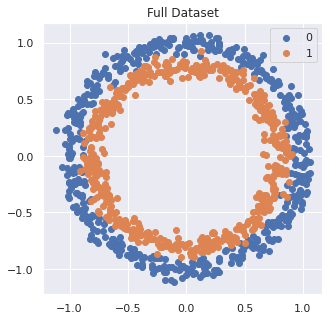

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1])
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1])
plt.legend(['0','1'])
plt.title('Full Dataset')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(X,y,shuffle = True, random_state = 42, stratify = y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


Text(0.5, 1.0, 'Train Set')

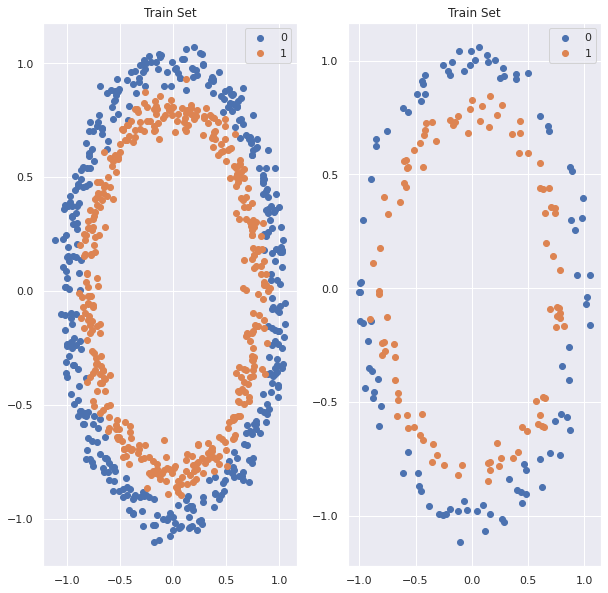

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.scatter(X_train[np.where(y_train==0),0],X_train[np.where(y_train==0),1])
plt.scatter(X_train[np.where(y_train==1),0],X_train[np.where(y_train==1),1])
plt.legend(['0','1'])
plt.title('Train Set')
plt.subplot(1,2,2)
plt.scatter(X_test[np.where(y_test==0),0],X_test[np.where(y_test==0),1])
plt.scatter(X_test[np.where(y_test==1),0],X_test[np.where(y_test==1),1])
plt.legend(['0','1'])
plt.title('Train Set')

### TODOs 2 [2 Points]

**Hoàn thành tất cả các mục bên dưới**

*   Xây dựng và huấn luyện mô hình Support Vector Machine cho bài toán này, học viên phải kết hợp thêm ``GridSearchCV`` vào để tìm ra bộ hyper-parameter tốt nhất.
  * Lưu ý khi khởi tạo ``SVC``phải truyền vào ``random_state=42``
*   Sau khi hoàn tất quá trình huấn luyện, đánh giá hiệu suất của mô hình trên tập Train và Test.
*   Dùng hàm plot_decision_boundary có sẵn bên trên để vẽ decision boundary cho mô hình SVM, đặt tên tương ứng
*   Vẽ Confusion Matrix trên tập Test.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

rbf_search = {'kernel': ['rbf'], 'gamma': gamma_values, 'C': C_values}

linear_poly_search = {'kernel': ['linear','poly'], 'C': C_values}

param_grid = [rbf_search, linear_poly_search]

model = SVC()
grid = GridSearchCV(model,param_grid,cv =3)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 0.3, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
print("Train",grid.score(X_train,y_train))
print("Test",grid.score(X_test,y_test))

Train 0.96875
Test 0.98


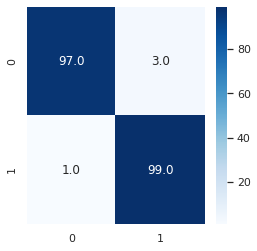

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True, cmap ='Blues',fmt = '.1f')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


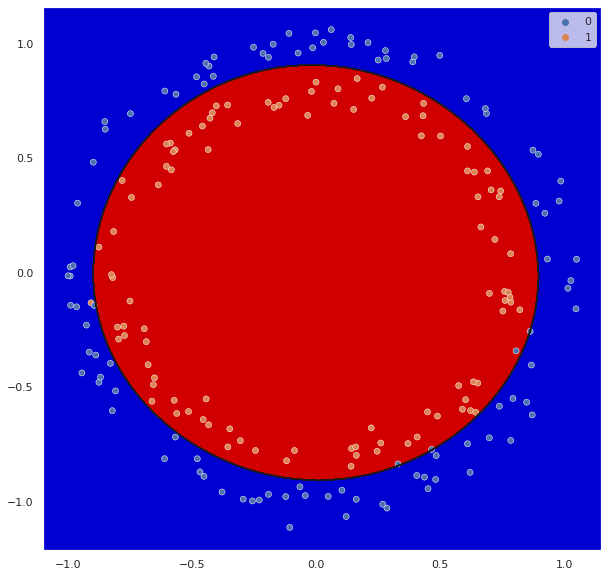

In [ ]:
plot_decision_boundaries(grid,X_test,y_test)

# 13.2 [4 Points] CNN & RNN for Image Classification

Mục tiêu:


*   Kết hợp layer Convolution1D và RNN để phân loại các hình ảnh đầu vào


## 13.2.1 Chuẩn bị dữ liệu

**Download data**

In [ ]:
!wget "http://download.tensorflow.org/data/quickdraw_tutorial_dataset_v1.tar.gz"
!7z x "quickdraw_tutorial_dataset_v1.tar.gz"
!7z x "quickdraw_tutorial_dataset_v1.tar" -o'/content/data'

--2020-12-16 13:49:43--  http://download.tensorflow.org/data/quickdraw_tutorial_dataset_v1.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.9.208, 2607:f8b0:4004:806::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.9.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1065301781 (1016M) [application/gzip]
Saving to: ‘quickdraw_tutorial_dataset_v1.tar.gz.3’

quickdraw_tutorial_ 100%[===================>]   1016M   217MB/s    in 4.5s    

2020-12-16 13:49:48 (226 MB/s) - ‘quickdraw_tutorial_dataset_v1.tar.gz.3’ saved [1065301781/1065301781]


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1065301781 bytes (1016 MiB)

Extracting archive: quickdraw_tutorial_dataset_v1.tar.gz
--
Path = 

**Load dữ liệu nhãn**

In [ ]:
with open('/content/data/eval.tfrecord.classes') as valid_classes_file:
    valid_classes = valid_classes_file.readlines()
    
with open('/content/data/eval.tfrecord.classes') as train_classes_file:
    train_classes = train_classes_file.readlines()

for index, class_name in enumerate(train_classes):
  train_classes[index] = class_name.strip().lower()
for index, class_name in enumerate(valid_classes):
  valid_classes[index] = class_name.strip().lower()

print('Number of classes:', len(train_classes))
print('Last 10 classes')
print()
for item in train_classes[-10:]:
  print(item)

Number of classes: 345
Last 10 classes

palm tree
binoculars
diamond
star
popsicle
flying saucer
sword
ice cream
lantern
shorts


**Load dữ liệu training** 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import glob
quickdraw_dir = '/data'
train_paths = glob.glob("/content/data/training.tfrecord-*")
eval_paths = glob.glob("/content/data/eval.tfrecord-*") 

def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths, labels
print(sketches.shape)
print(lengths.shape)
print(labels.shape)

def quickdraw_dataset(filepaths):
    dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=5) 
    dataset = dataset.cache()
    dataset = dataset.batch(256)
    dataset = dataset.map(parse, num_parallel_calls=5)
    return dataset.prefetch(1)

train_set = quickdraw_dataset(train_paths)
valid_set = quickdraw_dataset(eval_paths)

def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)


(256, 502, 3)
(256,)
(256,)


**Hàm hỗ trợ vẽ hình**

In [ ]:
def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = train_classes[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 10
    n_rows = 10
    plt.figure(figsize=(20,20))
    for i in range(100):
      plt.subplot(n_rows, n_cols, i + 1)
      draw_sketch(sketches[i][:lengths[i]], labels[i])
    plt.show()

**Visualize 100 tấm ảnh trong Train Set**

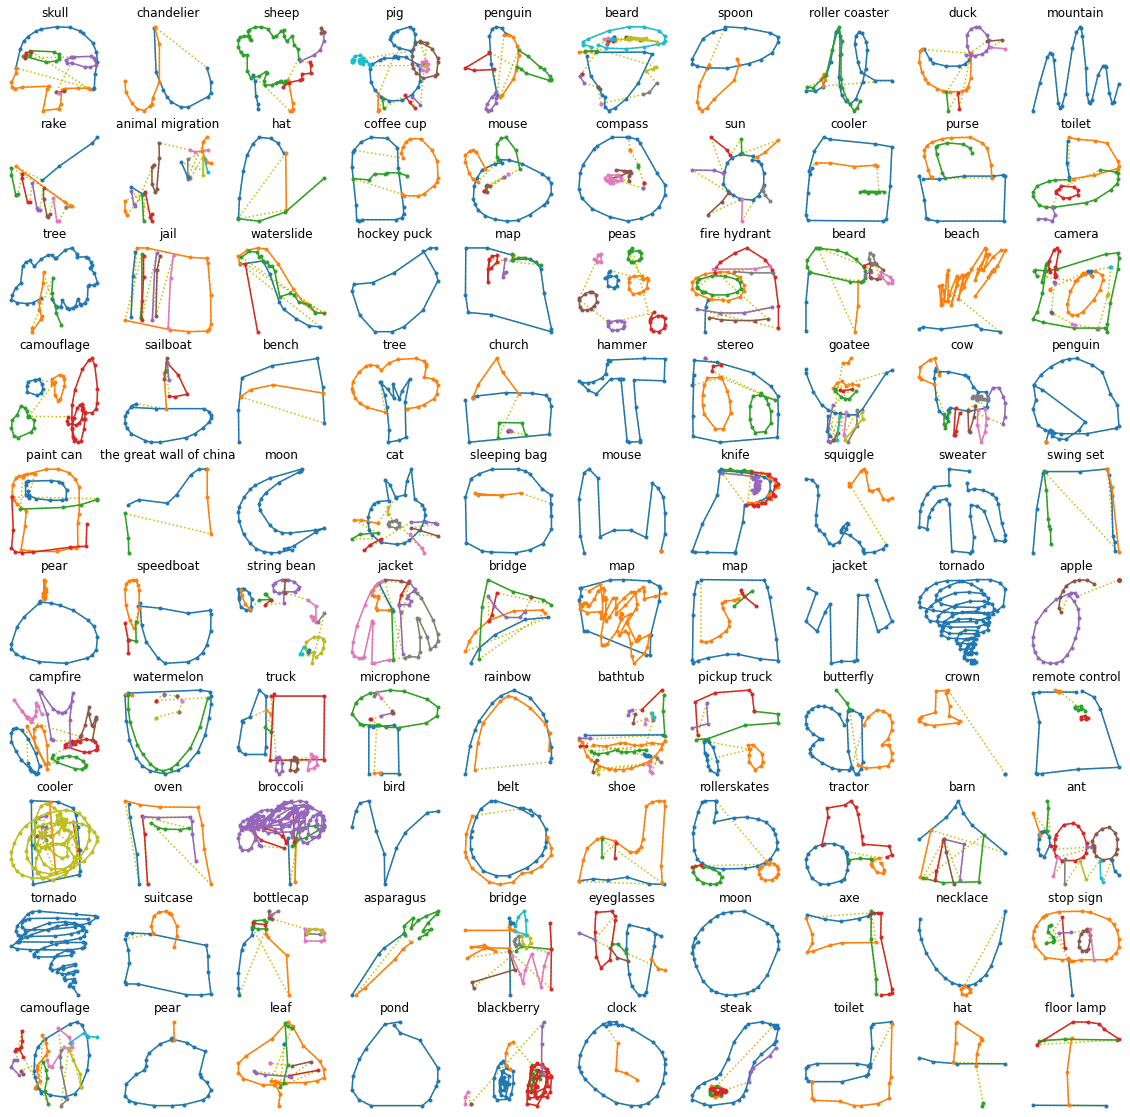

In [ ]:
for sketches, lengths, labels in train_set.take(1):
  draw_sketches(sketches, lengths, labels)
  break

## 13.2.2 [4 Points] Train and Evaluate

### TODOS 3 [4 Points]

**Weights Path** https://drive.google.com/file/d/1iIc94Nmt8rsZrEqDno1Fm00yYsB1MsyG/view?usp=sharing

- Lưu file weights trên vào Google Drive của mình

- Thiết kế mô hình có kiến trúc như sau (layer đầu tiên không cần input_shape):

![mid-term](https://i.imgur.com/Fx7Cltg.jpg)

- Sau đó chạy câu lệnh sau
```
model.build(input_shape=(None, None, 3))
model.load_weights(path_to_weights_file) 
# example
# model.load_weights('/content/drive/My Drive/weights.hdf5') 
```

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Flatten,Conv1D,RNN,LSTM,BatchNormalization,Input
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *


model = Sequential()
model.add(Conv1D(32,5,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv1D(64,5,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv1D(128,3,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128))
model.add(Dense(345, activation = 'softmax'))
model.build(input_shape=(None, None, 3))
model.load_weights('/content/drive/My Drive/Colab Notebooks/midterm/weights.hdf5') 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, None, 32)          512       
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 32)          128       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 64)          10304     
_________________________________________________________________
batch_normalization_4 (Batch (None, None, 64)          256       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 128)         24704     
_________________________________________________________________
batch_normalization_5 (Batch (None, None, 128)         512       
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 128)        

**Nếu làm đúng tất cả các mục trên sẽ chạy được 2 cell bên dưới**

In [ ]:
y_pred = model.predict(cropped_valid_set)


109
[322  15  65  76 168]
Top 5 predictions:
bed
yoga
bridge
table
couch


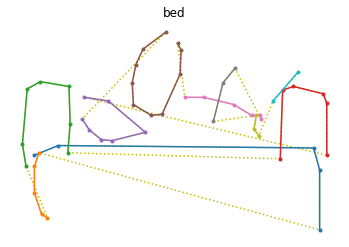

In [ ]:
# np.random.seed(42)
for sketches, lengths, labels in valid_set.take(1):
  random = np.random.randint(0, 256, 1)[0]
  print(random)
  temp = y_pred[random].argsort()[-5:][::-1]
  print(temp)
  print('Top 5 predictions:')
  for i in temp:
    print(train_classes[i])
  draw_sketch(sketches[random][:lengths[random]], labels[random])    
  plt.show()
  break

# 13.3 [3 Point] Exploratory Data Analysis (EDA)

Dataset được sử dụng ở đây là Adult Income.

Dataset chứa thông tin của những người được khảo sát và Income của họ.

In [ ]:
!wget https://datahub.io/machine-learning/adult/r/adult.csv

--2020-12-16 13:17:40--  https://datahub.io/machine-learning/adult/r/adult.csv
Resolving datahub.io (datahub.io)... 104.18.48.253, 172.67.157.38, 104.18.49.253, ...
Connecting to datahub.io (datahub.io)|104.18.48.253|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/machine-learning/adult/adult_csv/data/c8c87915d76926896a93604761460f22/adult_csv.csv [following]
--2020-12-16 13:17:41--  https://pkgstore.datahub.io/machine-learning/adult/adult_csv/data/c8c87915d76926896a93604761460f22/adult_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 104.18.48.253, 104.18.49.253, 172.67.157.38, ...
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|104.18.48.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5202952 (5.0M) [text/csv]
Saving to: ‘adult.csv’

adult.csv           100%[===================>]   4.96M  --.-KB/s    in 0.02s   

2020-12-16 13:17:41 (229 MB/s) - ‘adult.csv’ saved [5202952/52

In [ ]:
import pandas as pd

df = pd.read_csv('/content/adult.csv')
# xóa 2 cột không cần thiết
df = df.drop(columns=['fnlwgt', 'education-num'])

## 13.3.1 [1 Point] Data Exploration


### TODOs 4 [1 Point]
**Hoàn thành tất cả các mục bên dưới**

*   In ra shape của Dataframe
*   In ra 10 dòng ngẫu nhiên trong Dataframe
*   In ra thống kê sơ bộ của dữ liệu trong Dataframe
*   In ra kiểu dữ liệu (data type) của các feature, có feature nào định dạng là object hay không ?
*   In ra số lượng dòng bị null (tên khác na hoặc nan) của mỗi feature
*   Đối với các feature (cột) có dữ liệu dạng Danh Mục (Category): In ra số lượng dữ liệu của mỗi Danh Mục


In [ ]:
df.shape

(48842, 13)

In [ ]:
df.sample(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
14684,0,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,3,United-States,>50K
19261,1,Private,Bachelors,Never-married,Farming-fishing,Own-child,White,Male,0,0,3,United-States,<=50K
39782,4,Self-emp-not-inc,10th,Separated,Sales,Other-relative,Other,Male,0,0,2,Cuba,<=50K
21216,2,State-gov,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,United-States,>50K
46638,3,Local-gov,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,2,United-States,>50K
26218,2,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,Nicaragua,<=50K
13512,4,Local-gov,HS-grad,Widowed,Other-service,Not-in-family,White,Female,0,0,0,United-States,<=50K
39163,1,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,Other,Female,3,0,2,India,>50K
44609,1,Private,10th,Never-married,Craft-repair,Not-in-family,White,Male,0,0,2,United-States,<=50K
24982,0,Private,Some-college,Never-married,Sales,Other-relative,White,Male,1,0,0,United-States,<=50K


In [ ]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.771078,0.200319,0.114942,1.950698
std,1.295378,0.746182,0.556924,0.897038
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,0.000000,0.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      46033 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capitalgain     48842 non-null  int64 
 9   capitalloss     48842 non-null  int64 
 10  hoursperweek    48842 non-null  int64 
 11  native-country  47985 non-null  object
 12  class           48842 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


In [ ]:
df.isnull().sum()

age                  0
workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

In [ ]:
#Đối với các feature (cột) có dữ liệu dạng Danh Mục (Category): In ra số lượng dữ liệu của mỗi Danh Mục
df.iloc[0,:]
class_name = ['age','workclass','education','marital-status','occupation','relationship','race','sex','native-country','class','capitalgain','capitalloss','hoursperweek']
for feature in class_name :
    print('{}\n'.format(df[feature].value_counts()))

1    12719
2    11952
0     9627
3     8296
4     6248
Name: age, dtype: int64

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Prof-specialty       6172
Craft-repair       

## 13.3.2 [1 Point] Data Visualization

### TODOs 5 [1 Point]
*   Dùng thư viện seaborn vẽ 1 vài catplot mà bạn thích và thử giải thích các đồ thị vừa vẽ

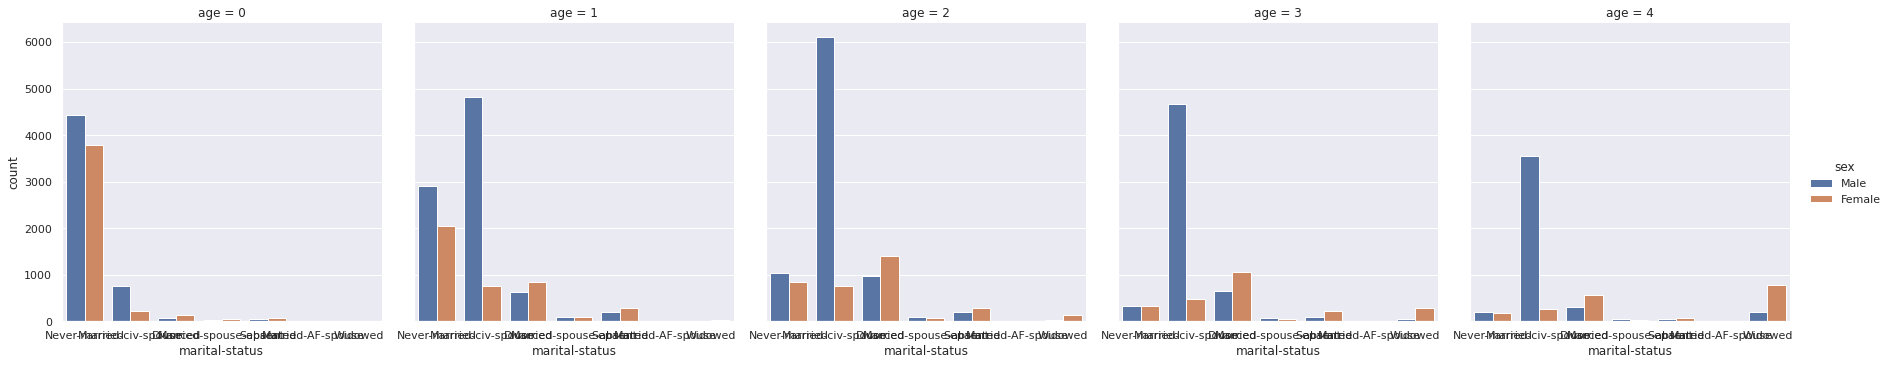

In [ ]:
import seaborn as sns
sns.set()
sns.catplot(data=df,
            x='marital-status',
            col='age',
            kind='count',
            hue = 'sex')

Ở độ tuổi thứ bao nhiêu có bao nhiêu người là nam hay nữ ở tình trạng hôn nhân nhân như thế nào

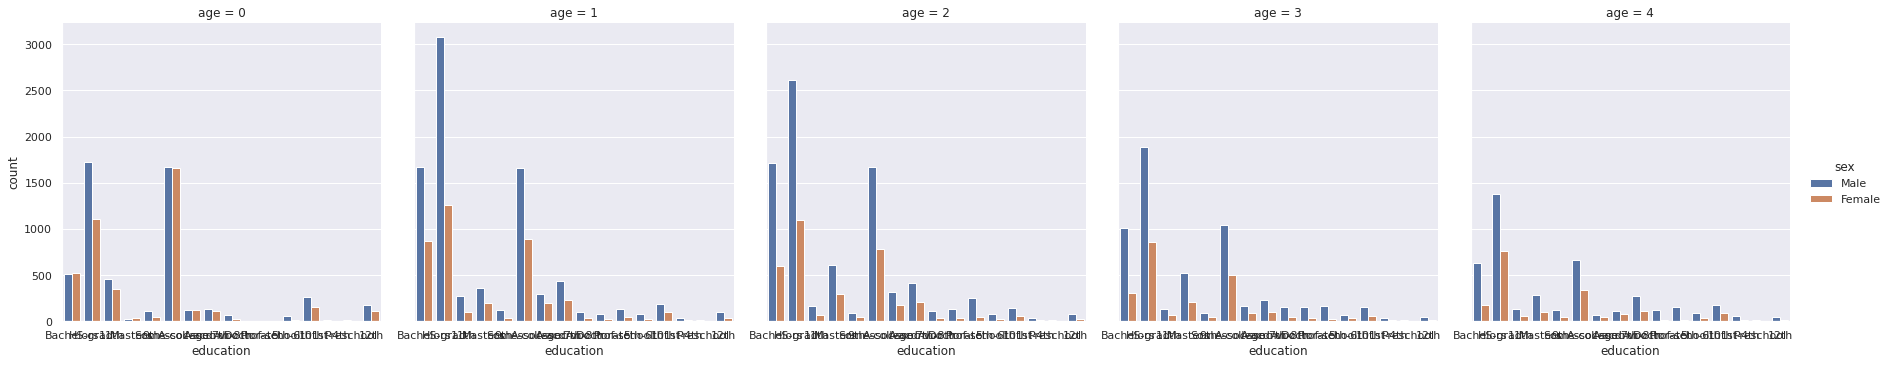

In [ ]:
sns.catplot(data=df,
            x='education',
            col='age',
            kind='count',
            hue = 'sex')

Ở nhóm độ tuổi thứ 1 có bao nhiêu người là nam hay nữ ở đang ở học vị nào 

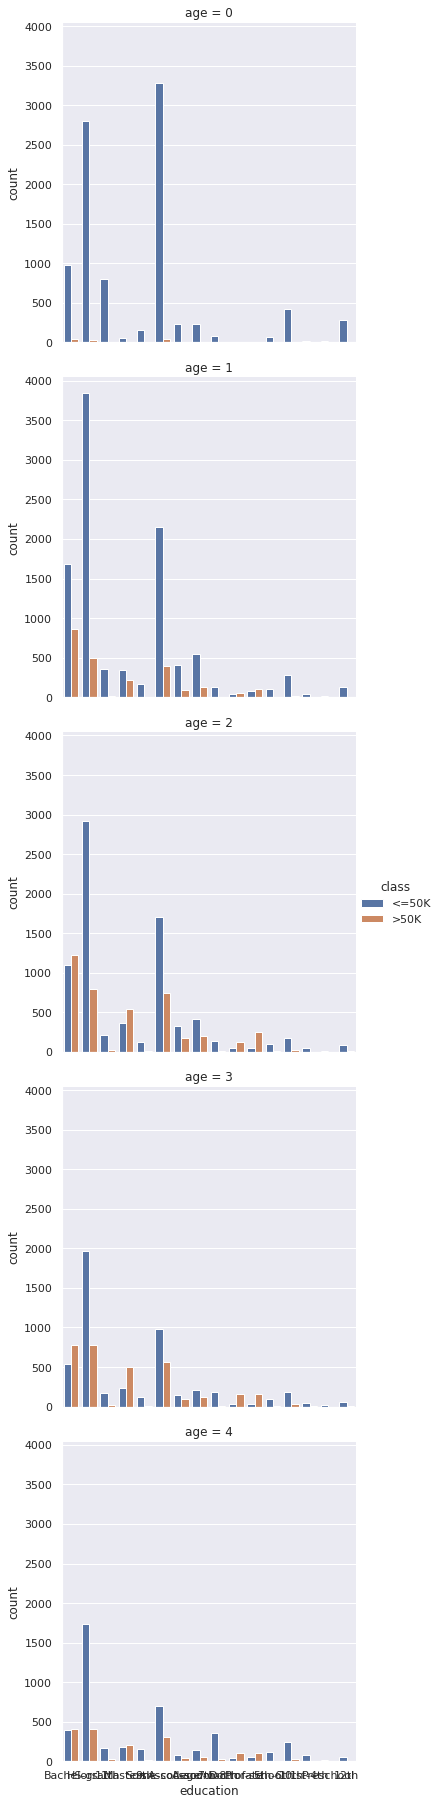

In [ ]:
sns.catplot(data=df,
            x='education',
            row='age',
            kind='count',
            hue = 'class',
            )

Có bao nhiêu người ở độ tuổi nào với chức vụ bao nhiêu thì được số tiền như vậy

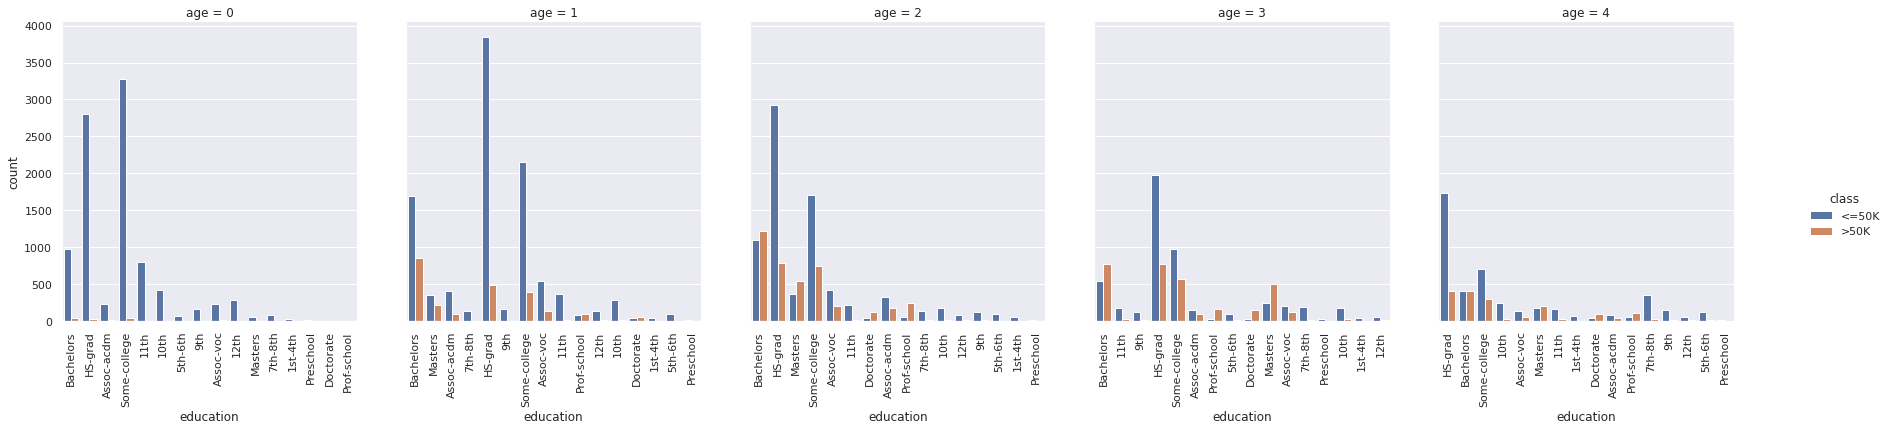

In [ ]:
g=sns.catplot(data=df,x='education', col='age', kind='count',hue='class',ci=None,sharex=False,margin_titles=True)
temp=[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

## 13.3.3 [1 Point] Data Transforming and Features Encoding

### TODOs 6 [1 Point]

*   Theo bạn, liệu có thể biến đổi các Feature hiện tại thành Feature mới được không, nêu cách biến đổi của bạn
*   Theo bạn, với các dữ liệu kiểu Danh Mục (Categorical) trong dataset trên, ta có thể áp dụng kiểu Encode nào?



Có thể biến đổi. Gộp feature marital-status và relationship thành 1 feature relationship.


Dùng Label encoding